In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from modules.agents import TDAgent
from modules.environments import GridWorld

## Normal Agent

In [ ]:
sim_summaries = []

for world in ['treasure_island', 'grid', 'wall', 'double_wall', 'maze', 'tbone']:
    
    print(f'Testing {world}')
    
    normal_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'normal_the_{world}'
    )
    addicted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'addicted_the_{world}',
        salience_factor=1.3
    )
    depleted_agent = TDAgent(
        world=GridWorld(file_path=f'grid_worlds//the_{world}.txt'),
        agent_tag=f'depleted_the_{world}',
        dopamine_alteration=0.3
    )
    
    for agent in tqdm([normal_agent, addicted_agent, depleted_agent]):
        
        sim_summary = agent.simulate(
            max_iter=1000, 
            verbose=200
        )
        sim_summary['steps'] = sim_summary['steps'].astype('int')
        sim_summary['steps'] = sim_summary['steps'].rolling(window=30, min_periods=1).mean()
        sim_summary['iteration'] = sim_summary['iteration'].astype('int')
        
        sim_summary['world'] = world
        sim_summary['agent'] = agent.agent_tag.split('_')[0]
        sim_summaries.append(sim_summary)
        
sim_summaries = pd.concat(sim_summaries, ignore_index=True)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Testing treasure_island


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [03:06<01:45, 105.66s/it]

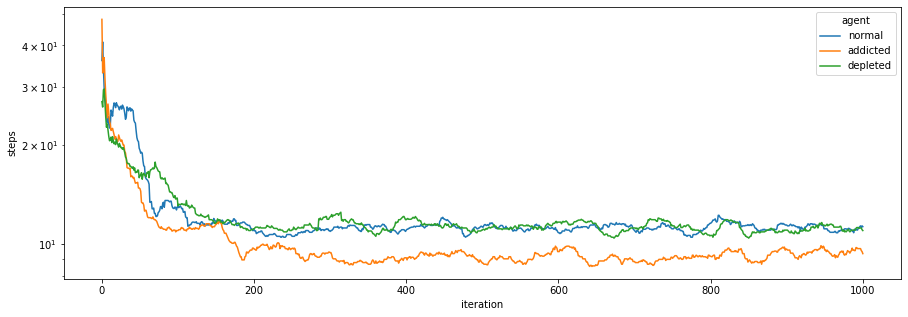

In [42]:
plt.figure(figsize=(15, 5))

sns.lineplot(
    x='iteration',
    y='steps',
    hue='agent',
    data=sim_summries[sim_summries['world'] == 'wall']
)
plt.yscale('log')